<h1 style = "background:black;color:white;border:0;border-radius:3px;font-family:Comic Sans MS">📋 Content :</h1><a id="cont"></a>

<ul>
    <li style = "color:darkgray;font-size:15px"> <a href = "#1" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> INTRODUCTION </a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#2" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> TASKS </a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#3" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> THE DATA </a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#dt" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> DATA TRANSFORMATION</a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#cv" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> CLUSTERING BASED ON DATASET ATTRIBUTES</a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#em" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> ESTIMATION OF NUMBER OF CLUSTERS</a> </li>    
    <li style = "color:darkgray;font-size:15px"> <a href = "#kmn" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> K-MEANS APPROACH</a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#kmd" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> K-MEDOIDS APPROACH</a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#sc" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> SPECTRAL CLUSTERING</a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#agl" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> AGGLOMERATIVE APPROACH</a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#ds" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> DBSCAN APPROACH</a> </li>    
    <li style = "color:darkgray;font-size:15px"> <a href = "#clv" style = "color:black;font-weight:bold;font-family:Comic Sans MS"> CLUSTER VALIDATION</a> </li>
</ul>

<a id = "1"></a><h1>INTRODUCTION</h1>Clustering is a technique for finding groups of objects such that the objects in a group will be similar (or related) to one another and different from (or unrelated to) the objects in other groups.<br>
Clustering is often called an unsupervised learning task as no class values denoting an a priori grouping of the data instances are given, which is the case in supervised learning. 

A good clustering method will produce high quality clusters with
* high intra-class similarity
* low inter-class similarity 

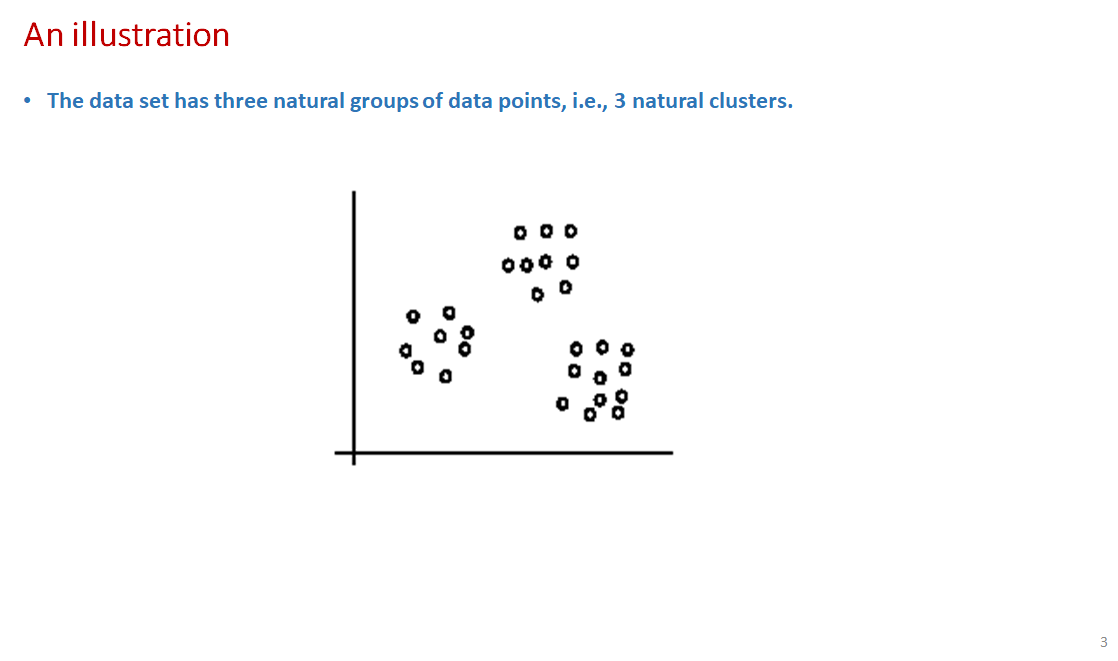

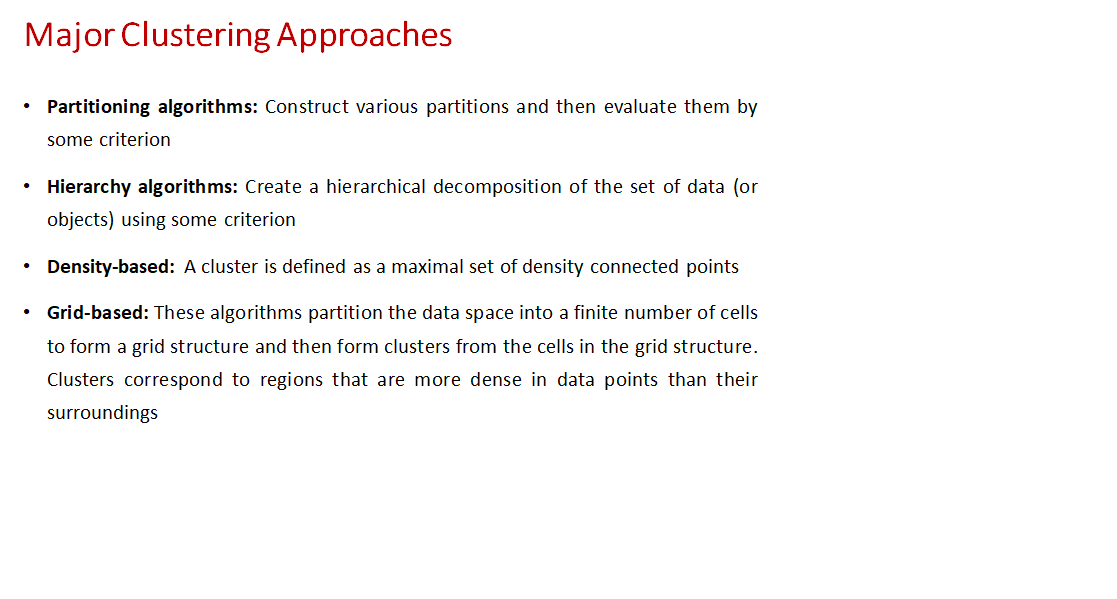

# <a id="2"></a>TASKS<br>
In this notebook, we will perform the following tasks:
* <a href= "#dt">Task 1: Data Transformation.</a><br>
* <a href= "#cv">Task 2: Cluster visualization on the basis of categorical variables of the data.</a>
* <a href= "#em">Task 3: Estimating the number of clusters.</a>
* <a href= "#_">Task 4: Applying different clustering algorithm on the data and visualizing the datapoints[considering either 1d, 2d or 3d of the data]. </a>
* <a href= "#clv">Task 5: Cluster validation</a>



<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

#### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# THE DATA<a id="3"></a>

In [ ]:
df = pd.read_csv(r"/kaggle/input/insurance/insurance.csv")
df.drop_duplicates(keep="first",inplace=True)
df.sample(5)

# DATA TRANSFORMATION: <a id='dt'></a>
Transforming the whole data to numeric values. 

We follow two different types of transformation here.<br>
<UL>
    <LI>**ORDINAL ENCODING**: For visualization purposes.<br>df=> enc_data</LI>
    <LI>**ONE HOT ENCODING**: For extracting the instinct of the complete data.<br>df=> data</LI>
    </UL>

In [ ]:
#ordinal encoding
enc_data = df.copy(deep=True)

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

enc.fit(enc_data["sex"])
enc_data["sex"] = enc.transform(enc_data["sex"])

enc.fit(enc_data["smoker"])
enc_data["smoker"] = enc.transform(enc_data["smoker"])

enc.fit(enc_data["region"])
enc_data["region"] = enc.transform(enc_data["region"])

enc_data.sample(5)

In [ ]:
#one hot encoding
data = pd.get_dummies(df,drop_first=True)
data.columns

data.rename(columns = { 'sex_male':'sex', 'smoker_yes':'smoker',
                       'region_northwest':'NW', 'region_southeast':'SE',
                       'region_southwest':'SW'}, inplace = True)

data.sample(5)




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

# CLUSTERING BASED ON DATASET ATTRIBUTES<a id='cv'></a>

We can form clusters from our data based on any of it's attribute. In that case, we have two options:
* Use a variable that is categorical.
* Transform a continuous variable to categorical variable and then use it for cluster formation.

Here we derive a categorical variable "BMI_Category" from "bmi".

In [ ]:
bmi_cat = []
for i in df.bmi:
    if i<=18.5:
        bmi_cat.append(0)
    elif (i> 18.5 and i<=25):
        bmi_cat.append(1)
    elif (i>25 and i<30):
        bmi_cat.append(2)
    else:
        bmi_cat.append(3)
enc_data["BMI_Category"]=bmi_cat
enc_data.sample(10)

In [ ]:
# Two subplots: one with BMI category and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="BMI_Category", data=enc_data, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=enc_data, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

# ESTIMATION OF NUMBER OF CLUSTERS<a id='em'></a>

<h3> ELBOW METHOD:</h3>To estimate the appropriate number of clusters.

     The elbow method is a technique used to choose the most optimal number of clusters. In Kmeans clustering we add the number of clusters in a manual way, so the elbow method is useful when using Kmeans.<br>As more iterations run to find the optimal number of clusters, the line will take the shape of the arm and the optimal number of clusters is the point that is in the elbow part of the arm.
 
         The elbow method finds the average sum of squared distance between the cluster centroid and the data observations. As the number of clusters increases,the average sum of squares decreases. So the distance between the data points and the centroids decreases as well. Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In this case this implies that one should choose a number of clusters so that adding another cluster doesn't give much better modeling  of the data.
         

**Metrics for kElbowVisualizer object includes:**

* distortion: mean sum of squared distances to centers

* silhouette: mean ratio of intra-cluster and nearest-cluster distance

* calinski_harabasz: ratio of within to between cluster dispersion

NOTE: The mechanism of Silhoutte coefficient is dicussed elaborately at the end of the notebook.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=6)

### Elbow method for Pair of columns:

In [ ]:
#pair of columns on which k-elbow is visualized.

l1=["age","bmi","charges"]
l2=list(enc_data.columns)
l2.remove("BMI_Category")
for c in l1:
    l2.remove(c)

#both continuous or 1 continuous,1 categorical variable
list_ = [[x,y] for x in l1 for y in l2 if x!=y]+[[x,y] for x in l1 for y in l1 if x!=y]


Here we use K-mean as the base model for estimating the number of clusters.

In [ ]:
#viz. example for pair of columns
var = 1 
X = enc_data[list_[var]]  #enc_data[['age', 'children']]
print(X.sample(5))

fig = plt.figure(figsize=(12,8))
visualizer = KElbowVisualizer(model,
                              #metric="silhouette",
                              k=(2,20))
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  


In [ ]:
print("When columns {} are considered, optimal number of clusters is {} and the Silhoutte score at that point is {}."
      .format(list_[var],visualizer.elbow_value_,visualizer.elbow_score_))

In [ ]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_)  
kmeans.fit(X)

# Printing the Centroids
print("The centroids:\n",kmeans.cluster_centers_)

print("\n\nThe labels:",kmeans.labels_)

**Cluster Visualization**

In [ ]:
fig = plt.figure(figsize=(12,8))

fig = plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='blue', marker="x", s=100)
plt.title("Kmeans Clustering", fontsize=16)
plt.xlabel(X.columns[0].upper())
plt.ylabel(X.columns[1].upper())
plt.legend(*fig.legend_elements(num=len(set(kmeans.labels_))),bbox_to_anchor =(1.2, 1))

plt.show()

Now, let's check the optimal k values considering all possible pairs of the data columns.

In [ ]:
elbow_values=[]
for pair in list_:
    X = enc_data[pair]
    visualizer = KElbowVisualizer(model,
                                  #metric="silhouette",
                                  k=(2,20))
    visualizer.fit(X)
    elbow_values.append(visualizer.elbow_value_)

In [ ]:
l1,l2 = [], []
for l in list_:
    l1.append(l[0])
    l2.append(l[1])
w = pd.DataFrame({"column 1":l1,"column 2":l2,"Optimal k":elbow_values})
print("Optimal value of clusters obtained for pair of columns with elbow method:")
w




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

### Elbow method for whole data:

In [ ]:
fig = plt.figure(figsize=(12,8))
visualizer = KElbowVisualizer(model,
                              #metric="silhouette",
                              k=(2,20))
visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof()  


In [ ]:
n = visualizer.elbow_value_
print("Hence the optimal number of clusters =", n)




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

**Now we implement different clustering algorithms with n_clusters = 5.**

# K -MEANS<a id="kmn"></a>
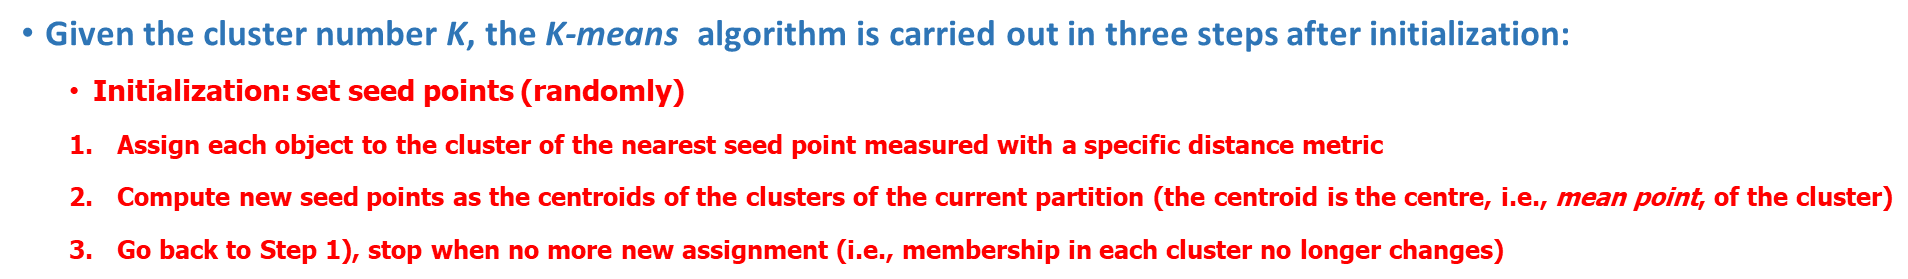

In [ ]:

kmeans = KMeans(n_clusters=n)  
kmeans.fit(data)

# Printing the Centroids
print("The centroids:\n",kmeans.cluster_centers_)

print("\n\nThe labels:",kmeans.labels_)

### Cluster-wise Frequency Distribution

In [ ]:
def counter(list_):
    d={}
    for i in list_:
        if i in d:
            d[i]+=1
        else:
            d[i]=1

    nd={}
    for i in sorted(d):
        nd[i]=d[i]
    return nd

In [ ]:
cluster_frequency = counter(kmeans.labels_)
xs = list(cluster_frequency.keys())
ys = list(cluster_frequency.values())

plt.bar(xs,ys,color=sns.color_palette("husl",len(xs)))
plt.xlabel("CLUSTER")
plt.ylabel("FREQUENCY")
plt.title("FREQUENCY PER CLUSTER",fontsize=16)
plt.show()

### Datapoint Visualization

#### 1D

Each level of Y-axis represents each clusters.

In [ ]:
"""
A function that will take a column index or column name 
and return cluster visualization according to that column. 
"""
def k_mean_1d_viz(v):

    if str(v).isalpha() and v in list(data.columns):
        v = list(data.columns).index(v)
        
    elif str(v).isalpha() and v not in list(data.columns):
        return "No column named '{}' exists!".format(v)
    
    fig = plt.figure(figsize=(12,8))
    xs,ys = data.values[:,v], kmeans.labels_
    
    fig = plt.scatter(xs,ys, c=kmeans.labels_, cmap="Set1_r", s=25)
    plt.scatter(kmeans.cluster_centers_[:,v] ,range(n),
                color='black', marker="o", s=100)
    plt.title("K-Means Clusters\n"+data.columns[v].upper(),
              fontsize=16)
    plt.tick_params(left=False,labelleft=False)
    plt.legend(*fig.legend_elements(num=len(set(kmeans.labels_)))
               ,bbox_to_anchor =(1.2, 1))

    plt.show()

In [ ]:
k_mean_1d_viz("bmi")

In [ ]:
k_mean_1d_viz(3)

In [ ]:
k_mean_1d_viz("height")

#### 2D

In [ ]:
"""
A function that will take a list of (2 column index) or
(2 column names) or (1 column index and 1 column name) 
and return cluster visualization according to those columns. 
"""
def k_mean_2d_viz(v):
    for i in range(2):

        if str(v[i]).isalpha() and v[i] in list(data.columns):
            v[i] = list(data.columns).index(v[i])

        elif str(v[i]).isalpha() and v[i] not in list(data.columns):
            return "No column named '{}' exists!".format(v[i])

    fig = plt.figure(figsize=(12,8))

    fig = plt.scatter(data.values[:,v[0]], data.values[:,v[1]], c=kmeans.labels_, cmap="Set1_r", s=25)
    plt.scatter(kmeans.cluster_centers_[:,v[0]] ,kmeans.cluster_centers_[:,v[1]], color='blue', marker="x", s=100)
    plt.title("Kmeans Clustering", fontsize=16)
    plt.xlabel(data.columns[v[0]].upper())
    plt.ylabel(data.columns[v[1]].upper())
    plt.legend(*fig.legend_elements(num=len(set(kmeans.labels_))),bbox_to_anchor =(1.2, 1))

    plt.show()

In [ ]:
k_mean_2d_viz(["bmi","charges"])

In [ ]:
k_mean_2d_viz([0,"bmi"])

#### 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

In [ ]:
"""
A function that will take a list of (3 column index) or
(3 column names) or (a mixture of three elements of column 
index and  column names) and return cluster visualization 
according to those columns. 
"""    

def k_mean_3d_viz(list_):
    for i in range(3):

        if str(list_[i]).isalpha() and list_[i] in list(data.columns):
            list_[i] = list(data.columns).index(list_[i])

        elif str(list_[i]).isalpha() and list_[i] not in list(data.columns):
            return "No column named '{}' exists!".format(list_[i])
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    xs, ys, zs = data.values[:,list_[0]], data.values[:,list_[1]], data.values[:,list_[2]]

    fig = ax.scatter(xs, ys, zs,  c=kmeans.labels_, cmap="Set1_r", s=25)
    ax.scatter(kmeans.cluster_centers_[:,list_[0]] ,kmeans.cluster_centers_[:,list_[1]],
               kmeans.cluster_centers_[:,list_[2]],
               color='black', marker="x", s=100)
    ax.set_xlabel(list(data.columns)[list_[0]])
    ax.set_ylabel(list(data.columns)[list_[1]])
    ax.set_zlabel(list(data.columns)[list_[2]])
    ax.set_title("Kmeans Clustering ", fontsize=16)
    plt.legend(*fig.legend_elements(num=len(set(kmeans.labels_))),bbox_to_anchor =(1.2, 1))
    fig

In [ ]:
k_mean_3d_viz(random.sample(range(data.shape[1]),3))

In [ ]:
k_mean_3d_viz(random.sample(list(data.columns),3))

Or manually enter column index or column names.




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

# K-MEDOIDS<a id="kmd"></a>
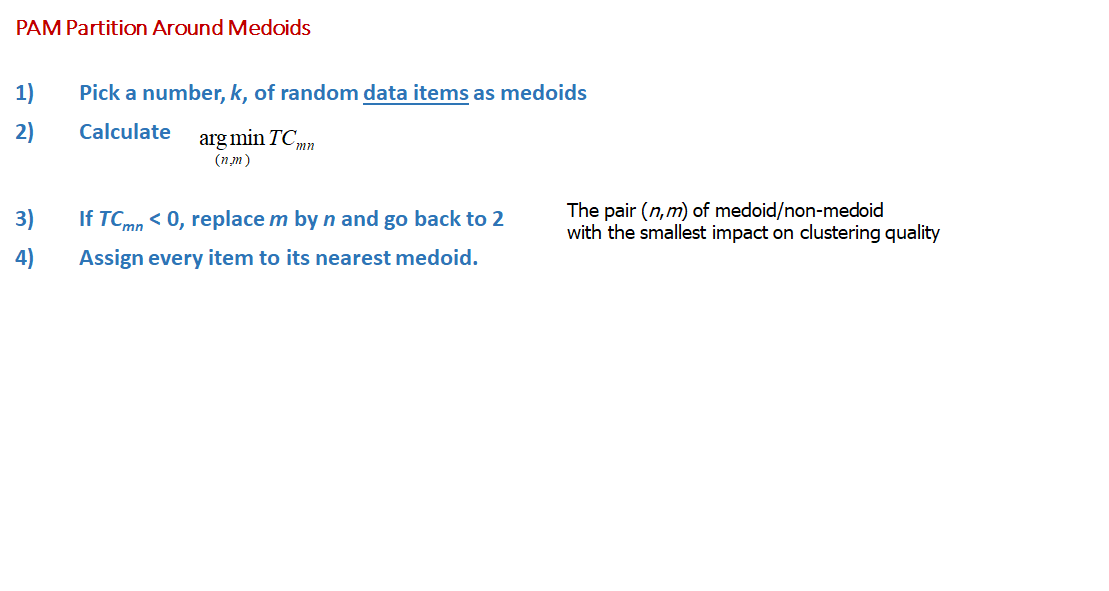

To install scikit learn extra, run:
conda install -c conda-forge scikit-learn-extra

In [ ]:
conda install -c conda-forge scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=n)  
kmedoids.fit(data)

# Printing the Centroids
print("The medoids:\n",kmedoids.cluster_centers_)

print("\n\n",kmedoids.labels_)

### Cluster-wise Frequency Distribution

In [ ]:
cluster_frequency = counter(kmedoids.labels_)
xs = list(cluster_frequency.keys())
ys = list(cluster_frequency.values())

plt.bar(xs,ys,color=sns.color_palette("pastel",len(xs)))
plt.xlabel("CLUSTER")
plt.ylabel("FREQUENCY")
plt.title("FREQUENCY PER CLUSTER",fontsize=16)
plt.show()

### Datapoint Visualization

#### 1D

Each level of Y-axis represents each clusters.

In [ ]:
"""
A function that will take a column index or column name 
and return cluster visualization according to that column. 
"""
def k_med_1d_viz(v):

    if str(v).isalpha() and v in list(data.columns):
        v = list(data.columns).index(v)
        
    elif str(v).isalpha() and v not in list(data.columns):
        return "No column named '{}' exists!".format(v)
    
    fig = plt.figure(figsize=(12,8))
    xs,ys = data.values[:,v], kmedoids.labels_
    print(xs)
    fig = plt.scatter(xs,ys, c=kmedoids.labels_, cmap="Set1_r", s=25)
    plt.scatter(kmedoids.cluster_centers_[:,v] ,range(n),
                color='black', marker="o", s=100)
    plt.title("K-Medoids Clusters\n"+data.columns[v].upper(),
              fontsize=16)
    plt.tick_params(left=False,labelleft=False)
    plt.legend(*fig.legend_elements(num=len(set(kmedoids.labels_))),
               bbox_to_anchor =(1.2, 1))

    plt.show()

In [ ]:
k_med_1d_viz("bmi")

In [ ]:
k_med_1d_viz(3)

In [ ]:
k_med_1d_viz("height")

#### 2D

In [ ]:
"""
A function that will take a list of (2 column index) or
(2 column names) or (1 column index and 1 column name) 
and return cluster visualization according to those columns. 
"""
def k_med_2d_viz(v):
    for i in range(2):
        if str(v[i]).isalpha() and v[i] in list(data.columns):
            v[i] = list(data.columns).index(v[i])

        elif str(v[i]).isalpha() and v[i] not in list(data.columns):
            return "No column named '{}' exists!".format(v[i])

    fig = plt.figure(figsize=(12,8))

    fig = plt.scatter(data.values[:,v[0]], data.values[:,v[1]], c=kmedoids.labels_, cmap="Set1_r", s=25)
    plt.scatter(kmedoids.cluster_centers_[:,v[0]] ,kmedoids.cluster_centers_[:,v[1]], color='blue', marker="x", s=100)
    plt.title("K-Medoids Clustering", fontsize=16)
    plt.xlabel(data.columns[v[0]].upper())
    plt.ylabel(data.columns[v[1]].upper())
    plt.legend(*fig.legend_elements(num=len(set(kmedoids.labels_))),bbox_to_anchor =(1.2, 1))

    plt.show()

In [ ]:
k_med_2d_viz(["bmi","charges"])

In [ ]:
k_med_2d_viz([0,"bmi"])

#### 3D

In [ ]:
"""
A function that will take a list of (3 column index) or
(3 column names) or (a mixture of three elements of column 
index and  column names) and return cluster visualization 
according to those columns. 
"""    

def k_med_3d_viz(list_):
    for i in range(3):

        if str(list_[i]).isalpha() and list_[i] in list(data.columns):
            list_[i] = list(data.columns).index(list_[i])

        elif str(list_[i]).isalpha() and list_[i] not in list(data.columns):
            return "No column named '{}' exists!".format(list_[i])
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    xs, ys, zs = data.values[:,list_[0]], data.values[:,list_[1]], data.values[:,list_[2]]

    fig = ax.scatter(xs, ys, zs,  c=kmedoids.labels_, cmap="Set1_r", s=25)
    ax.scatter(kmedoids.cluster_centers_[:,list_[0]] ,kmedoids.cluster_centers_[:,list_[1]],
               kmedoids.cluster_centers_[:,list_[2]],
               color='blue', marker="*", s=300)
    ax.set_xlabel(list(data.columns)[list_[0]])
    ax.set_ylabel(list(data.columns)[list_[1]])
    ax.set_zlabel(list(data.columns)[list_[2]])
    ax.set_title("K-Medoids Clustering ", fontsize=16)
    plt.legend(*fig.legend_elements(num=len(set(kmedoids.labels_))),bbox_to_anchor =(1.2, 1))
    fig

In [ ]:
k_med_3d_viz(random.sample(range(data.shape[1]),3))

In [ ]:
k_med_3d_viz(random.sample(list(data.columns),3))

Or manually enter column index or column names.

One of the main point to notice here is that unlike k-means, the centroids in case of k-medoids are chosen among the data points themselves.




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

# SPECTRAL CLUSTERING<a id = "sc"></a>

One version of kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

Spectral clustering is a clustering technique that reduces complex multidimensional datasets into clusters of similar data in rarer dimensions. The main outline is to cluster the all spectrum of unorganized data points into multiple groups based upon their uniqueness.It is "one of the most popular forms of multivariate statistical analysis”. It uses the connectivity approach to clustering wherein communities of  datapoints that are connected or immediately next to each other are identified in the visualization. The datapoints are then mapped to a low-dimensional space that can be easily segregated to form clusters. 

This clustering technique uses information from the eigenvalues (spectrum) of special matrices (i.e. Affinity Matrix, Degree Matrix and Laplacian Matrix) derived from the graph or the data set.

Spectral clustering methods are attractive, easy to implement, reasonably fast especially for sparse data sets up to several thousand. It treats the data clustering as a graph partitioning problem without making any assumption on the form of the data clusters.


In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=n, affinity='nearest_neighbors',
                        n_jobs=None,assign_labels='kmeans')
sc.fit(data)

### Cluster-wise Frequency Distribution

In [ ]:
cluster_frequency = counter(sc.labels_)
xs = list(cluster_frequency.keys())
ys = list(cluster_frequency.values())

fig = plt.bar(xs,ys,color=sns.color_palette("flare",len(xs)))
plt.xlabel("CLUSTER")
plt.ylabel("FREQUENCY")
plt.title("FREQUENCY PER CLUSTER",fontsize=16)

plt.show()

In [ ]:
"""
A function that will take a list of (2 column index) or
(2 column names) or (1 column index and 1 column name) 
and return cluster visualization according to those columns. 
"""
def sc_2d_viz(v):
    for i in range(2):
        if str(v[i]).isalpha() and v[i] in list(data.columns):
            v[i] = list(data.columns).index(v[i])

        elif str(v[i]).isalpha() and v[i] not in list(data.columns):
            return "No column named '{}' exists!".format(v[i])

    fig = plt.figure(figsize=(12,8))

    fig = plt.scatter(data.values[:,0], data.values[:,1], c=sc.labels_, cmap="Set1_r", s=25)
    plt.title("Spectral Clustering", fontsize=16)
    plt.xlabel(data.columns[0].upper())
    plt.ylabel(data.columns[1].upper())
    plt.legend(*fig.legend_elements(num=len(set(sc.labels_))),bbox_to_anchor =(1.2, 1))

    plt.show()

In [ ]:
sc_2d_viz(["bmi","charges"])




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

# AGGLOMERATIVE CLUSTERING<a id="agl"></a>

A heirarchical clustering technique.

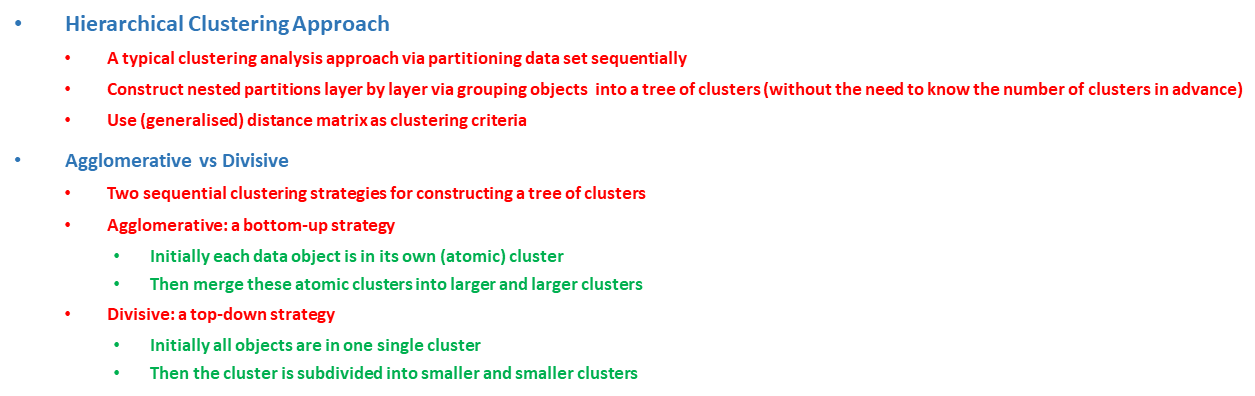

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agl = AgglomerativeClustering(linkage = "complete", n_clusters=n).fit(data)

**LINKAGE**

* Single-link : The distance between two clusters is represented by the distance of the closest pair of data objects belonging to different clusters.
* Complete-link: The distance between two clusters is represented by the distance of the farthest pair of data objects belonging to different clusters.
* Average-link: The distance between two clusters is represented by the average distance of all pairs of data objects belonging to different clusters.
* Centroid : The distance between two clusters is represented by the distance between the means of the cluters.


### Cluster-wise Frequency Distribution

In [ ]:
cluster_frequency = counter(agl.labels_)
xs = list(cluster_frequency.keys())
ys = list(cluster_frequency.values())

fig = plt.bar(xs,ys,color=sns.color_palette("flare",len(xs)))
plt.xlabel("CLUSTER")
plt.ylabel("FREQUENCY")
plt.title("FREQUENCY PER CLUSTER",fontsize=16)

plt.show()

### Datapoint Visualization

#### 1D

In [ ]:
"""
A function that will take a column index or column name 
and return cluster visualization according to that column. 
"""
def ag_1d_viz(v):

    if str(v).isalpha() and v in list(data.columns):
        v = list(data.columns).index(v)
        
    elif str(v).isalpha() and v not in list(data.columns):
        return "No column named '{}' exists!".format(v)
    
    fig = plt.figure(figsize=(12,8))

    fig = plt.scatter(data.values[:,v], agl.labels_,
                      c=agl.labels_, cmap="Set2_r", s=25)
    plt.title("Agglomerative Clustering \n'{}' distribution ".format(data.columns[v].upper()), fontsize=16)
    plt.tick_params(left=False,labelleft=False)
    plt.legend(*fig.legend_elements(num=len(set(agl.labels_))),bbox_to_anchor =(1.2, 1))
    plt.show()

In [ ]:
ag_1d_viz("age")

In [ ]:
ag_1d_viz(1)

From the following particular output, we can see that "charges" are one of the main features influencing the clusters.

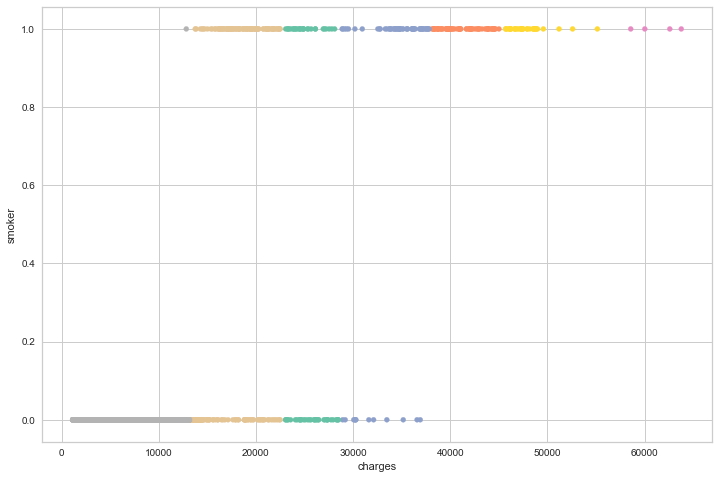



#### 2D

In [ ]:
"""
A function that will take a list of (2 column index) or
(2 column names) or (1 column index and 1 column name) 
and return cluster visualization according to those columns. 
"""
def ag_2d_viz(_):
    for i in range(2):
        if str(_[i]).isalpha() and _[i] in list(data.columns):
            _[i] = list(data.columns).index(_[i])

        elif str(_[i]).isalpha() and _[i] not in list(data.columns):
            return "No column named '{}' exists!".format(_[i])
    
    fig = plt.figure(figsize=(12,8))

    #print("COLUMNS SELECTED:\n{} and {}".format(data.columns[_[0]],data.columns[_[1]]))
    fig = plt.scatter(data.values[:,_[0]], data.values[:,_[1]],
                label=agl.labels_,
                c=agl.labels_, cmap="Set2_r", s=25)
    plt.title("Agglomerative Clustering",fontsize=16)
    plt.xlabel(data.columns[_[0]].upper())
    plt.ylabel(data.columns[_[1]].upper())
    plt.legend(*fig.legend_elements(num=len(set(agl.labels_))),bbox_to_anchor =(1.2, 1))
    plt.show()


In [ ]:
ag_2d_viz(["bmi","charges"])

In [ ]:
ag_2d_viz(["bmi",4])

#### 3D

In [ ]:
"""
A function that will take a list of (3 column index) or
(3 column names) or (a mixture of three elements of column 
index and  column names) and return cluster visualization 
according to those columns. 
"""    

def ag_3d_viz(list_):
    for i in range(3):

        if str(list_[i]).isalpha() and list_[i] in list(data.columns):
            list_[i] = list(data.columns).index(list_[i])

        elif str(list_[i]).isalpha() and list_[i] not in list(data.columns):
            return "No column named '{}' exists!".format(list_[i])
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    xs, ys, zs = data.values[:,list_[0]], data.values[:,list_[1]], data.values[:,list_[2]]

    fig = ax.scatter(xs, ys, zs,  c=agl.labels_, cmap="Set1_r", s=25)

    ax.set_xlabel(list(data.columns)[list_[0]].upper())
    ax.set_ylabel(list(data.columns)[list_[1]].upper())
    ax.set_zlabel(list(data.columns)[list_[2]].upper())
    ax.set_title("Agglomerative Clustering ", fontsize=16)
    plt.legend(*fig.legend_elements(num=len(set(agl.labels_))),bbox_to_anchor =(1.2, 1))
    fig

In [ ]:
ag_3d_viz(random.sample(range(data.shape[1]),3))

In [ ]:
ag_3d_viz(random.sample(list(data.columns),3))

Or manually enter column index or column names.




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

# DBSCAN : Density Based Spatial Clustering of Application of Noise <a id="ds"></a>

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
ds = DBSCAN(eps=400, min_samples=11).fit(data)
set(ds.labels_)

We use hit and trial to set the values of epsilon,"eps" and min_samples so as to get "n_clusters"(7) and get the data fairly distributed among all the clusters.

NOTE: Noisy samples are given label "-1".

### Cluster-wise Frequency Distribution

In [ ]:
cluster_frequency = counter(ds.labels_)
xs = list(cluster_frequency.keys())
ys = list(cluster_frequency.values())

fig = plt.bar(xs,ys,color=sns.color_palette("flare",len(xs)))
plt.xlabel("CLUSTER")
plt.ylabel("FREQUENCY")
plt.title("FREQUENCY PER CLUSTER",fontsize=16)

plt.show()

### Datapoint Visualization

#### 1D

In [ ]:
"""
A function that will take a column index or column name 
and return cluster visualization according to that column. 
"""
def ds_1d_viz(v):

    if str(v).isalpha() and v in list(data.columns):
        v = list(data.columns).index(v)
        
    elif str(v).isalpha() and v not in list(data.columns):
        return "No column named '{}' exists!".format(v)
    
    fig = plt.figure(figsize=(12,8))

    fig = plt.scatter(data.values[:,v], ds.labels_,
                      c=ds.labels_, cmap="Set2_r", s=25)
    plt.title("DBSCAN \n'{}' distribution ".format(data.columns[v].upper()), fontsize=16)
    plt.tick_params(left=False,labelleft=False)
    plt.legend(*fig.legend_elements(num=len(set(ds.labels_))),bbox_to_anchor =(1.2, 1))
    plt.show()

In [ ]:
ds_1d_viz("age")

In [ ]:
ds_1d_viz(1)

#### 2D

In [ ]:
"""
A function that will take a list of (2 column index) or
(2 column names) or (1 column index and 1 column name) 
and return cluster visualization according to those columns. 
"""
def ds_2d_viz(_):
    for i in range(2):
        if str(_[i]).isalpha() and _[i] in list(data.columns):
            _[i] = list(data.columns).index(_[i])

        elif str(_[i]).isalpha() and _[i] not in list(data.columns):
            return "No column named '{}' exists!".format(_[i])
    
    fig = plt.figure(figsize=(12,8))

    #print("COLUMNS SELECTED:\n{} and {}".format(data.columns[_[0]],data.columns[_[1]]))
    fig = plt.scatter(data.values[:,_[0]], data.values[:,_[1]],
                label=ds.labels_,
                c=ds.labels_, cmap="Set2_r", s=25)
    plt.title("DBSCAN",fontsize=16)
    plt.xlabel(data.columns[_[0]].upper())
    plt.ylabel(data.columns[_[1]].upper())
    plt.legend(*fig.legend_elements(num=len(set(ds.labels_))),bbox_to_anchor =(1.2, 1))
    plt.show()


In [ ]:
ds_2d_viz(["bmi","charges"])

In [ ]:
ds_2d_viz(["bmi",4])

#### 3D

In [ ]:
"""
A function that will take a list of (3 column index) or
(3 column names) or (a mixture of three elements of column 
index and  column names) and return cluster visualization 
according to those columns. 
"""    

def ds_3d_viz(list_):
    for i in range(3):

        if str(list_[i]).isalpha() and list_[i] in list(data.columns):
            list_[i] = list(data.columns).index(list_[i])

        elif str(list_[i]).isalpha() and list_[i] not in list(data.columns):
            return "No column named '{}' exists!".format(list_[i])
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    xs, ys, zs = data.values[:,list_[0]], data.values[:,list_[1]], data.values[:,list_[2]]

    fig = ax.scatter(xs, ys, zs,  c=ds.labels_, cmap="Set1_r", s=25)

    ax.set_xlabel(list(data.columns)[list_[0]].upper())
    ax.set_ylabel(list(data.columns)[list_[1]].upper())
    ax.set_zlabel(list(data.columns)[list_[2]].upper())
    ax.set_title("DBSCAN ", fontsize=16)
    plt.legend(*fig.legend_elements(num=len(set(ds.labels_))),bbox_to_anchor =(1.2, 1))
    fig

In [ ]:
ds_3d_viz(random.sample(range(data.shape[1]),3))

In [ ]:
ag_3d_viz(random.sample(list(data.columns),3))

Or manually enter column index or column names.




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

# CLUSTER VALIDATION<a id ="clv"></a>

Cluster validations can be categorized into 3 types: Internal, External and Relative validations where 
* Internal cluster validation : The clustering result is evaluated based on the data clustered itself (internal information) without reference to external information.
* External cluster validation : Clustering results are evaluated based on some externally known result, such as externally provided class labels.
* Relative cluster validation : The clustering results are evaluated by varying different parameters for the same algorithm (e.g. changing the number of clusters).

In the following task, we will perform some Internal cluster validations.

## Internal Cluster Validations<br>
### Introduction

Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions.
<ul>
<li> Compactness or cluster cohesion: Measures how close are the objects within the same cluster. A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.</li>
<li> Separation: Measures how well-separated a cluster is from other clusters. The indices used as separation measures include:
    <ul>
        <li>distances between cluster centers</li>
        <li>the pairwise minimum distances between objects in different clusters</li></ul></li>
<li> Connectivity: corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. The connectivity has a value between 0 and infinity and should be minimized.</li>
</ul>

 ### Commonly used measures
 
 The two commonly used indices for assessing the goodness of clustering are the **silhouette width** and the **Dunn index**. These internal measure can be used also to determine the optimal number of clusters in the data.

**1. Silhouette coefficient**<br>*WITH RESPECT TO EACH DATAPOINT*<br>
The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

For each observation i, the silhouette width s<sub>i</sub> is calculated as follows:

1. For each observation i, calculate the average dissimilarity a<sub>i</sub> between i and all other points of the cluster to which i belongs.
2. For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of    C. The smallest of these d(i,C) is defined as b<sub>i</sub>=min<sub>C</sub>d(i,C). 
   The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it        does not belong.
3. Finally the silhouette width of the observation i is defined by the formula:<br> S<sub>i</sub>=(b<sub>i</sub>−a<sub>i</sub>)/max(a<sub>i</sub>,b<sub>i</sub>).<br>

Silhouette width can be interpreted as follow:

* Observations with a large S<sub>i</sub> (almost 1) are very well clustered.
* A small S<sub>i</sub> (around 0) means that the observation lies between two clusters.
* Observations with a negative S<sub>i</sub> are probably placed in the wrong cluster.

Now that we have five clustering models:
1. K-means :"kmeans"
2. K-medoids :"kmedoids"
3. Spectral :"sc"
4. Agglomerative :"agl"
5. DBSCAN :"ds"

we try building a function that returns the Silhoutte width of each observation and then check which of our clustering models gives the least number of negative S<sub>i</sub>, meaning, the model that performed best.

In [ ]:
"""
params:
1. labels: cluster_object.labels_
2. ind: index of observation, i.
"""

def sil_wid(labels,ind):
    a = 0
    b = []
    #for computing 'a'
    for j in np.where(labels==labels[ind])[0]:
        a = a + abs(data.values[j,:]-data.values[ind,:]).sum()
    a = a/(len(np.where(labels==labels[ind])[0])-1)
    
    #for computing 'b'
    
    l = list(set(labels))
    l.remove(labels[ind])
    for lab in l:
        c = 0
        for j in np.where(labels==lab)[0]:
            c = c + abs(data.values[j,:]-data.values[ind,:]).sum()
        c = c/len(np.where(labels==lab)[0])
        b.append(c)
        
    b=min(b)
    
    S = (b-a)/max(a,b)
    return S

In [ ]:
silhoutte_width = {"kmeans":0,"kmedoids":0,
                   "sc":0,"agl":0,"ds":0}

In [ ]:
for i in range(len(data)):
    if sil_wid(kmeans.labels_,i)<0:
        silhoutte_width["kmeans"] +=1
    if sil_wid(kmedoids.labels_,i)<0:
        silhoutte_width["kmedoids"] +=1
    if sil_wid(sc.labels_,i)<0:
        silhoutte_width["sc"] +=1
    if sil_wid(agl.labels_,i)<0:
        silhoutte_width["agl"] +=1
    if sil_wid(ds.labels_,i)<0:
        silhoutte_width["ds"] +=1

In [ ]:
silhoutte_width

**Conclusion**

Hence, the number of data points that lie in wrong clusters for
1. K-means :0
2. K-medoids :29
3. Agglomerative :103
4. DBSCAN :272
5. Spectral Clustering :767




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

**2. Dunn index**<br>*WITH RESPECT TO EACH CLUSTER*<br>
The Dunn index is another internal clustering validation measure which can be computed as follow:

 
1. For each cluster, compute the distance between each of the objects in the cluster and the objects in the other clusters and use the minimum of this pairwise distance as the inter-cluster separation (minimum separation) {Single-Linkage}.
2. For each cluster, compute the distance between the objects in the same cluster and use the maximal intra-cluster distance (maximum diameter) as the intra-cluster compactness.
3. Calculate the Dunn index (D) as follow:<br>
    D =     <sup>minimum separation</sup>&frasl;<sub>maximum diameter</sub><br>

Dunn index can be interpreted as follows:

If the data set contains compact and well-separated clusters, the diameter of the clusters is expected to be small and the distance between the clusters is expected to be large. Thus, Dunn index should be maximized.

Similar to the above operation, here too, we try defining a function that returns Dunn index for a particular cluster created by a particular clustering object.

In [ ]:
def dunn(labels, clus):
    
    for i in np.where(labels!=clus)[0]:
        for j in np.where(labels==clus)[0]:
            ms = abs(data.values[j,:]-data.values[i,:]).sum()
            break
        break
    
    for i in np.where(labels!=clus)[0]:
        for j in np.where(labels==clus)[0]:
            if abs(data.values[j,:]-data.values[i,:]).sum()<ms:
                ms = abs(data.values[j,:]-data.values[i,:]).sum()
    
    md = 0
    ar = np.where(labels==clus)[0]
    for i in range(len(ar)-1):
        for j in range(i+1,len(ar)):
            if abs(data.values[j,:]-data.values[i,:]).sum()>md:
                md = abs(data.values[j,:]-data.values[i,:]).sum()
    
    d = ms/md
    return d
        

In [ ]:
list_ = [kmeans.labels_, kmedoids.labels_, sc.labels_, agl.labels_, ds.labels_]
di=[]
for l in list_:
    di.append(sum([dunn(l,i) for i in set(l)])/len(set(l)))    

In [ ]:
dunn_ind={"kmeans":di[0],"kmedoids":di[1],
                  "sc":di[2],"agl":di[3],"ds":di[4]}

dunn_ind




<style>
.footer {
  position: fixed;
  LEFT: 50;
  bottom: 0;
  width: 100%;
  background-color: red;
  color: white;
  text-align: right;
}
</style>

<div class="footer">
  <p><a href="#cont">GO BACK TO CONTENT</a></p>
</div>

**Conclusion**

According to our interpretation of Dunn Index, the best cluster distribution is given by the agglomerative clustering. We can further try different number of clusters and amend other parameters to maximize the Dunn index for each clustering objects to obtain higher cluster quality. 

**References:**<br>
<ul>
    <li><a href="https://www.datanovia.com/en/lessons/cluster-validation-statistics-must-know-methods/#internal-measures-for-cluster-validation">Cluster validation Essentials</a> </li>
    <li><a href="https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/">Cluster Validity indices</a> </li>
   </ul>